# 03 LOGISTIC REGRESSION IRIS DATASET

In [48]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## EDA

In [50]:
df=sns.load_dataset("iris")

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
df.shape

(150, 5)

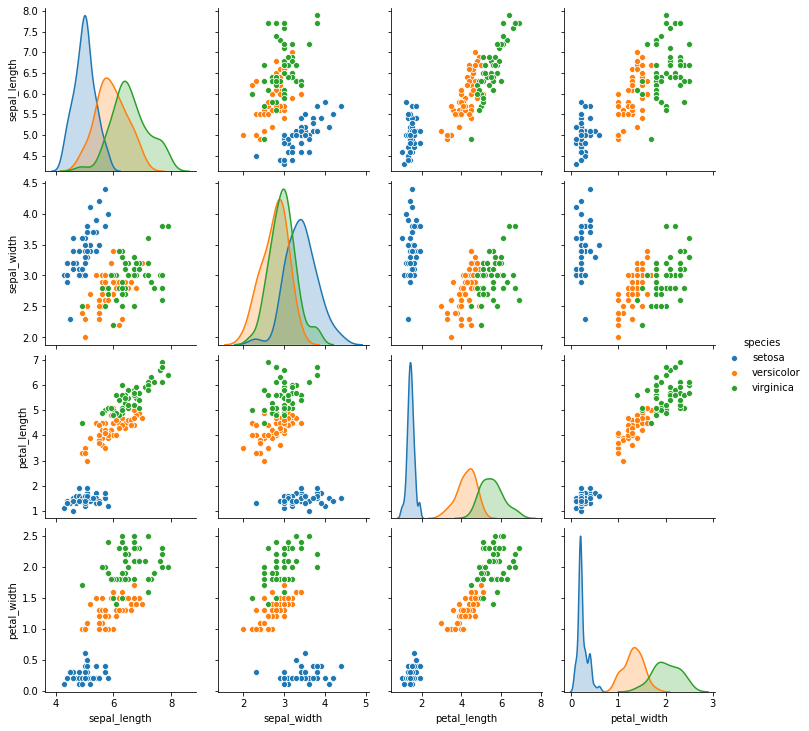

In [53]:
sns.pairplot(df, hue="species");

In [54]:
df.isnull().sum().any()

False

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## TRANSFORM LABEL ENCODER

In [56]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
model=LabelEncoder()
model.fit(df.species)

LabelEncoder()

In [59]:
model.transform(df.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
df['species']=model.transform(df.species)
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,1
117,7.7,3.8,6.7,2.2,2
15,5.7,4.4,1.5,0.4,0
29,4.7,3.2,1.6,0.2,0
82,5.8,2.7,3.9,1.2,1
51,6.4,3.2,4.5,1.5,1
98,5.1,2.5,3.0,1.1,1
27,5.2,3.5,1.5,0.2,0
52,6.9,3.1,4.9,1.5,1
94,5.6,2.7,4.2,1.3,1


## SPLIT DATA

In [61]:
X=df.drop(["species"], axis=1)
y=df["species"]

In [62]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 42)

## TRAINING MODEL

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
print(model.score(X,y)*100)

97.33333333333334


## EVALUATION

In [69]:
model.intercept_

array([  8.90000845,   2.00667196, -10.9066804 ])

In [70]:
model.coef_

array([[-0.38938713,  0.92002851, -2.3310421 , -0.9832832 ],
       [ 0.49944835, -0.30965488, -0.21514181, -0.73398729],
       [-0.11006122, -0.61037363,  2.54618391,  1.71727049]])

## PREDICTION

In [71]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

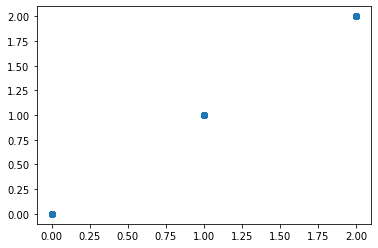

In [72]:
plt.scatter(y_test,y_pred);

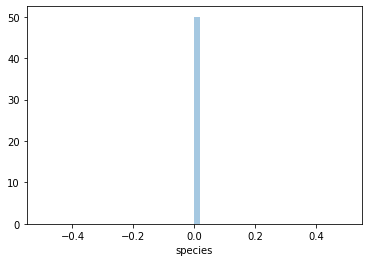

In [73]:
sns.distplot((y_test-y_pred), bins=50);

In [74]:
y_pred_train=model.predict(X_train)

## EVALUATION METRICS 

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [77]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2score = r2_score(actual, pred)
    print(f"R2 Score: {r2score}",
          f"Mean Absolute Error(MAE): {mae}",
          f"Mean Square Error(MSE): {mse}",
          f"Root Mean Square Error(RMSE): {rmse}",sep="\n")

In [78]:
eval_metrics(y_test, y_pred)

R2 Score: 1.0
Mean Absolute Error(MAE): 0.0
Mean Square Error(MSE): 0.0
Root Mean Square Error(RMSE): 0.0


In [79]:
eval_metrics(y_train, y_pred_train)

R2 Score: 0.9451450961185258
Mean Absolute Error(MAE): 0.03571428571428571
Mean Square Error(MSE): 0.03571428571428571
Root Mean Square Error(RMSE): 0.1889822365046136


## COMPARISON of ACTUAL and PREDICTIONS 

In [35]:
my_dict={"Actual":y_test, "Predicted":y_pred}
compare=pd.DataFrame(my_dict)
compare

,Actual,Predicted
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


## CONFUSION MATRIX

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import scikitplot.metrics as splt

In [81]:
results = confusion_matrix(compare.Actual, compare.Predicted)
print ('Confusion Matrix :\n',*results,sep='\n')

Confusion Matrix :

[15  0  0]
[ 0 11  0]
[ 0  0 12]


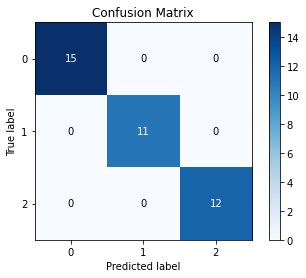

In [82]:
splt.plot_confusion_matrix(compare.Actual, compare.Predicted);

In [83]:
print ('Accuracy:',accuracy_score(compare.Actual, compare.Predicted))

Accuracy: 1.0


In [84]:
print('Classification Report :\n',classification_report(compare.Actual, compare.Predicted))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## ROC CURVE with SCIKITPLOT

In [85]:
y_pred_proba = model.predict_proba(X_test)

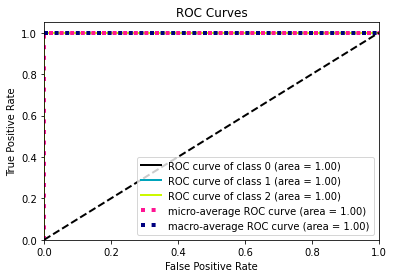

In [86]:
splt.plot_roc(y_test, y_pred_proba);